In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 40.0

In [3]:
mm = 1e-3
mrad = 1e-3

In [4]:
# L = 2.3 # m
L = 2050*mm

Measured parameters

In [5]:
sigma_x0 = 10.5*mm 

sigma_y0 = 9.01*mm 

In [6]:
x0 = 0*mm 
y0 = -5.0*mm 

In [7]:
xp0 = 0*mrad
yp0 = 1.75*mrad 

Fitted parameters

In [8]:
s_xf = 4 # m 
emitt_nx = 550*mm*mrad # normalized emittance 2
emitt_x = emitt_nx/gamma

In [9]:
s_yf = 4.55 # m 
emitt_ny = 450*mm*mrad # normalized emittance 
emitt_y = emitt_ny/gamma

$$
w_x(s) = \sqrt{\beta_{xf} + \frac{(s - s_{xf})^2}{\beta_{xf}}}
$$

$$
\sigma_x = \sqrt{ \beta_{x} \varepsilon_x}, ~~ w_x(s) = \sqrt{\beta_x(s)}
$$

$$
\sigma_x(s) = w_x(s) \sqrt{\varepsilon_x} =\sqrt{\beta_{xf} + \frac{(s - s_{xf})^2}{\beta_{xf}}}\sqrt{\varepsilon_x}
$$

$$
\beta_x = \frac{\sigma_x^2}{\varepsilon_x}
$$

$$
\sigma_x(s) = \sqrt{\frac{\sigma_{xf}^2}{\varepsilon_x} + \varepsilon_x \frac{(s - s_{xf})^2}{\sigma_{xf}^2}}\sqrt{\varepsilon_x} = \sqrt{\sigma_{xf}^2 + \varepsilon_x^2 \frac{(s - s_{xf})^2}{\sigma_{xf}^2}}
$$

$$
\sigma_x(s) = \sqrt{\sigma_{xf}^2 + (\sigma_{xf} \sigma_{x'})^2 \frac{(s - s_{xf})^2}{\sigma_{xf}^2}} = \sqrt{\sigma_{xf}^2 + (s - s_{xf})^2 \sigma_{x'}^2}
$$

Solve this equation for $\sigma_{xf}$ and s = 0 (pepper-pot's location)

$$
\sigma_x(s=0)^2 = \sigma_{xf}^2 + \varepsilon_x^2 \frac{s_{xf}^2}{\sigma_{xf}^2}
$$

$$
\sigma_{xf}^4 + \varepsilon_x^2 s_{xf}^2 - \sigma_{x0}^2 \sigma_{xf}^2 = 0
$$

$$
\varepsilon_{x} = \sigma_{xf} \sigma_{x'}
$$

$$
\sigma_{xf} = \sqrt{\sigma_{x0}^2 - \sigma_{x'}^2 s_{xf}^2}
$$

$$
\sigma_{x0} = \sqrt{\left(\frac{\varepsilon_x}{\sigma_x'}\right)^2 + \sigma_{x'}^2 s_{xf}^2}
$$

Emittance fit

$$
\sigma_{x'}^2 = \frac{\sigma_{x0}^2}{2s_{xf}^2} \pm \sqrt{\frac{\sigma_{x0}^2}{2s_{xf}^2} - \frac{\varepsilon_x^2}{s_{xf}^2}}  
$$

$$
\sigma_{x'} = \sqrt{\frac{\sigma_{x0}}{2s_{xf}^2} \pm \sqrt{\left(\frac{\sigma_{x0}^2}{2s_{xf}^2}\right)^2 - \frac{\varepsilon_x^2}{s_{xf}^2}}}
$$

In [10]:
sigma_xp = np.sqrt(sigma_x0**2/(2*s_xf**2) + np.sqrt((sigma_x0**2/(2*s_xf**2))**2 - emitt_x**2/(2*s_xf**2)))

In [11]:
sigma_yp = np.sqrt(sigma_y0**2/(2*s_yf**2) + np.sqrt((sigma_y0**2/(2*s_yf**2))**2 - emitt_y**2/(2*s_yf**2)))

In [12]:
sigma_xf = np.sqrt(sigma_x0**2 - sigma_xp**2 * s_xf**2) 

In [13]:
sigma_yf = np.sqrt(sigma_y0**2 - sigma_yp**2 * s_yf**2) 

In [14]:
s_start = np.min([s_xf,s_yf,0])

In [15]:
s = np.linspace(s_start, L, 300)

In [16]:
sigma_x = np.sqrt(sigma_xf**2 +(s - s_xf)**2 * sigma_xp**2)

In [17]:
sigma_y = np.sqrt(sigma_yf**2 +(s - s_yf)**2 * sigma_yp**2)

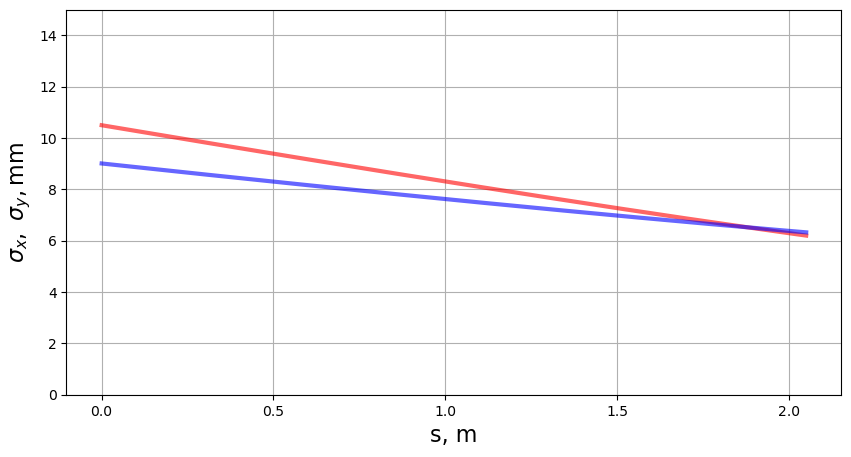

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(s, sigma_x/mm, c='red', lw=3, alpha=0.6) 
ax.plot(s, sigma_y/mm, c='blue', lw=3, alpha=0.6) 

ax.set_ylim(-0, 15)
ax.set_xlabel('s, m', fontsize=16)
ax.set_ylabel(r'$\sigma_x, ~\sigma_y, \mathrm{mm} $', fontsize=16)
ax.grid()
fig.show()

Monte Carlo model

In [19]:
N = 10000000

Define the beam distribution at the focal point

In [20]:
x  = np.random.normal(loc = x0, scale = sigma_xf, size=N)
y  = np.random.normal(loc = y0, scale = sigma_yf, size=N)

In [21]:
xp  = np.random.normal(loc = xp0, scale = sigma_xp, size=N)
yp  = np.random.normal(loc = yp0, scale = sigma_yp, size=N)

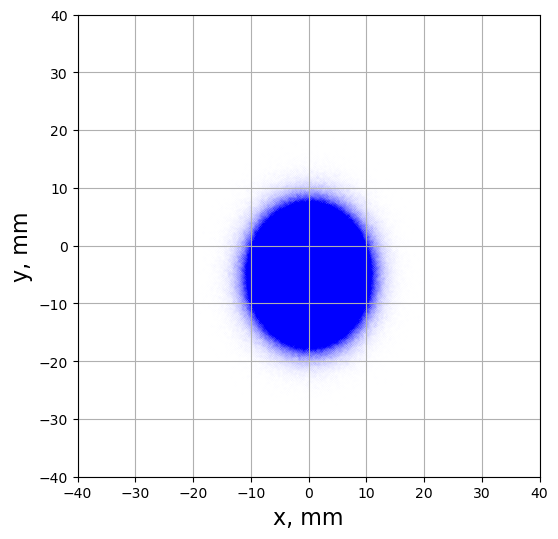

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x/mm, y/mm, c='blue', s=0.01, alpha=0.02) 

ax.set_aspect(1)
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_xlabel('x, mm', fontsize=16)
ax.set_ylabel('y, mm', fontsize=16)
ax.grid()
fig.show()

Track particles towards the pepper-pot.

In [23]:
x_i = x - xp*s_xf
y_i = y - yp*s_yf

In [24]:
x_i

array([-0.00053212, -0.00386491, -0.00167517, ..., -0.00044737,
        0.00732877,  0.02143748])

In [25]:
y_i

array([-0.02341298, -0.00790559, -0.02642199, ..., -0.00894393,
       -0.00140618, -0.01143368])

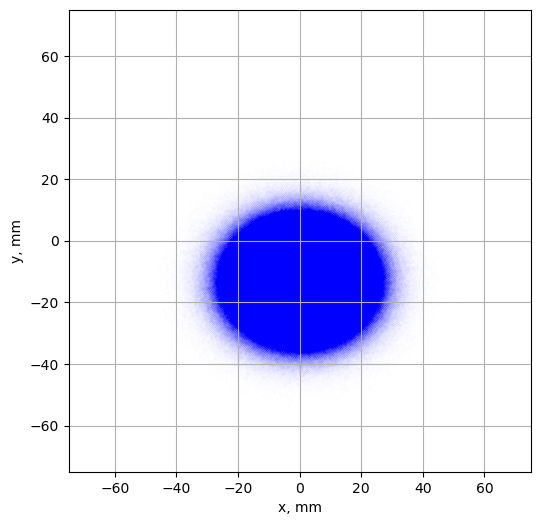

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_i/mm, y_i/mm, c='blue', s=0.01, alpha=0.02) 

ax.set_aspect(1)
ax.set_xlim(-75, 75)
ax.set_ylim(-75, 75)
ax.set_xlabel('x, mm')
ax.set_ylabel('y, mm')
ax.grid()
fig.show()

Pepper-pot

In [27]:
r0 = 1.5*mm
a = 10*mm
tilt = 45*np.pi/180 # rad

Coordinates across the pepper-pot

In [28]:
x_m = x_i
y_m = y_i/np.cos(np.pi/2 - tilt)

Periodic structure

In [29]:
xg = x_m - a*np.floor((x_m + 0.5*a)/a) 
yg = y_m - a*np.floor((y_m + 0.5*a)/a) 

r = np.sqrt(xg*xg + yg*yg)

In [30]:
x_b  = x_i[r<r0]
xp_b = xp[r<r0]

y_b  = y_i[r<r0]
yp_b = yp[r<r0]

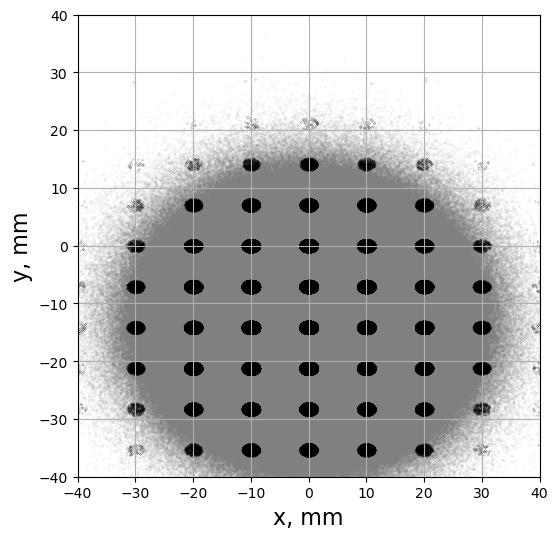

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_i/mm, y_i/mm, c='gray', s=0.01, alpha=0.6) 
ax.scatter(x_b/mm, y_b/mm, c='black', s=0.01, alpha=1)

ax.set_aspect(1)
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_xlabel('x, mm', fontsize=16)
ax.set_ylabel('y, mm', fontsize=16)
ax.grid()
fig.show()

Track to the profile monitor

In [32]:
x_l  = x_b + xp_b*L
y_l  = y_b + yp_b*L

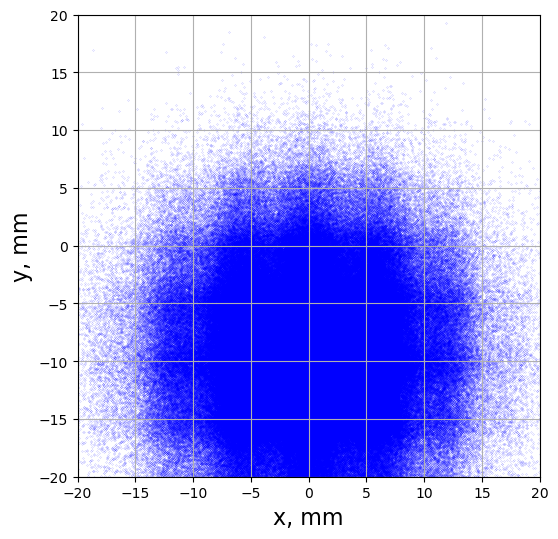

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_l/mm, y_l/mm, c='blue', s=0.01, alpha=0.8) 

ax.set_aspect(1)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('x, mm', fontsize=16)
ax.set_ylabel('y, mm', fontsize=16)
ax.grid()
# ax.tick_params
fig.show()

In [34]:
y_l/mm

array([-15.12788542,  -9.7339465 , -10.95326263, ..., -16.00676341,
       -10.10441757, -16.12680648])

In [35]:
# Условие для фильтрации: 0 <= y_l <= 5
mask1 = (y_l/mm >= 1) & (y_l/mm <= 5)

# Применение маски к массивам x_l и y_l
x_filtered1 = x_l[mask1]
y_filtered1 = y_l[mask1]

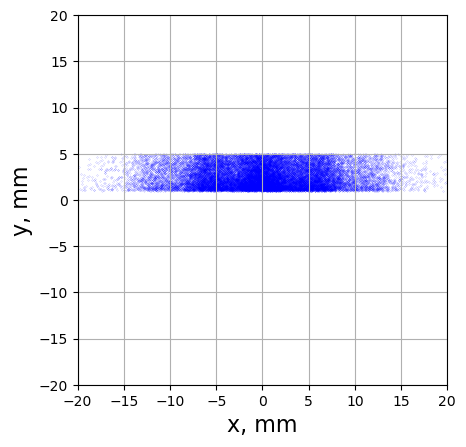

In [36]:
# Теперь x_filtered и y_filtered содержат только те точки, где y находится в диапазоне [0, 5]
# print("Фильтрованные x1:", x_filtered1)
# print("Фильтрованные y1:", y_filtered1)

fig, ax = plt.subplots()
ax.scatter(x_filtered1/mm, y_filtered1/mm, c='blue', s=0.01, alpha=0.8)
ax.set_aspect(1)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('x, mm', fontsize=16)
ax.set_ylabel('y, mm', fontsize=16)
ax.grid()
plt.show()

In [37]:
# Условие для фильтраци частиц
mask2 = (x_l/mm >= -5) & (x_l/mm <= 0)
# mask2 = (x_l/mm >= -1.9) & (x_l/mm <= 1.9)

x_filtered2 = x_l[mask2]
y_filtered2 = y_l[mask2]

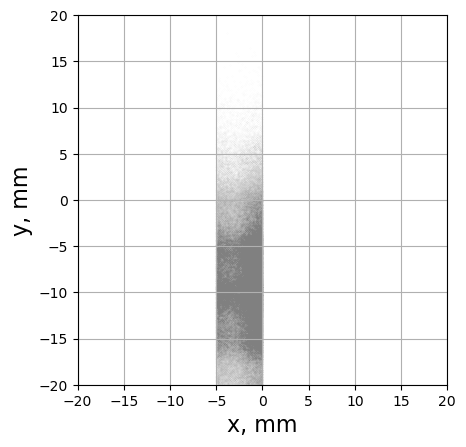

In [38]:
# Теперь x_filtered и y_filtered содержат только те точки, где y находится в диапазоне [0, 5]
# print("Фильтрованные x2:", x_filtered2)
# print("Фильтрованные y2:", y_filtered2)

fig, ax = plt.subplots()
ax.scatter(x_filtered2/mm, y_filtered2/mm, c='gray', s=0.01, alpha=0.08)
ax.set_aspect(1)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('x, mm', fontsize=16)
ax.set_ylabel('y, mm', fontsize=16)
ax.grid()
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, PIL

from PIL import ImageFilter
from scipy.ndimage import median_filter

from threading import Timer
from matplotlib.widgets import CheckButtons

import nanoscan

(1380, 1040)
2025.05/2025_05_27_quadrupole_scan/2025-05-27-16-50-31
{'Кадровый период': 220.0, 'Длительность экспозиции': 5.0, 'Усиление': '0 dB', 'Размер кадра: X': 0.0, 'Размер кадра: Y': 0.0, 'Размер кадра: Ширина': 1380.0, 'Размер кадра: Высота': 1040.0, 'Режим ввода': 'Однокадровый', 'Задержка начала экспозиции': 0.0, 'Источник начала ввода': 'Внешний TTL-вход', 'Событие начала ввода': 'Высокий уровень', 'Режим работы': 'Однокадровый', 'Напряжение на МКП': 850.0, 'Электронная диафрагма': 1.0, 'Задержка': 2785.0, 'Пауза между экспозициями': 200.0, 'Количество экспозиций': 1.0, 'Биннинг по X': 1.0, 'Биннинг по Y': 1.0, 'frame period': 220.0, 'exposure': 5.0, 'gain': '0 dB', 'frame size in X': 0.0, 'frame size in Y': 0.0, 'frame size: Width': 1380.0, 'frame size: Height': 1040.0, 'input mode': 'single frame', 'exposure start delay': 0.0, 'input trigger source': 'external TTL-input', 'trigger event': 'High level', 'acquisition mode': 'single frame', 'MCP voltage': 850.0, 'e-diaphragm'

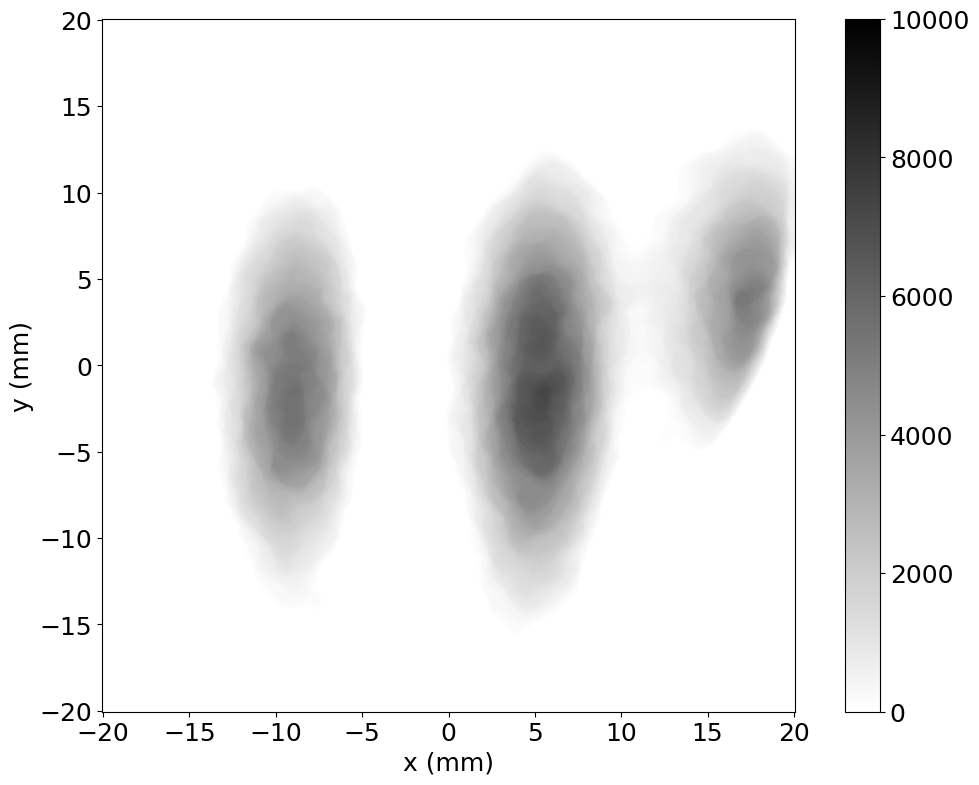

In [40]:
camera_id = 4 # camera index

x_center = 500 # pixels
y_center = 340 # pixels

rotation = 40 # degrees

# scale after rotation:
show_scales_in_mm = True

y_scale = 72.0/567 # mm / pixel
x_scale = y_scale # mm / pixel

# crop image after rotation:
crop_image = True
crop_width  = 40 # mm
crop_height = 40 # mm

folders = np.sort(glob.glob("????-??-??-*/"))
folder_index=len(folders)-1
folder = folders[folder_index]

folder = "2025.05/2025_05_27_quadrupole_scan/2025-05-27-16-50-31"

fig = plt.figure(figsize=(12,9))
plt.rcParams.update({"font.size": "18"})
plt.subplots_adjust(top=0.92, bottom=0.15, left=0.10, right=0.94, hspace=0.15, wspace=0.18)

M = [[0]]
ax = plt.imshow(M, cmap='gray_r', vmax=10000, vmin=0) #1
title = plt.title("")
plt.colorbar()

M = nanoscan.read_SPU2_image(folder, camera_id)
info = nanoscan.read_SPU2_image_info(folder, camera_id)
print(folder)
print(info)

M = M.rotate(rotation, center=(x_center,y_center), expand=0, resample=PIL.Image.BILINEAR)

width, height = M.size # pixels
left = 0; right = width # pixels
top = 0;  bottom = height  # pixels
    
if crop_image:
    left   = x_center - crop_width/x_scale/2
    right  = x_center + crop_width/x_scale/2

    top    = y_center - crop_height/y_scale/2
    bottom = y_center + crop_height/y_scale/2

    M = M.crop((left, top, right, bottom))
    
# substracting backgroud level:
M = M.filter(ImageFilter.MinFilter(3))
M_array = np.array(M)


x1, y1 = 200, 150 
width, height = 50, 50  

# Extract the background region
background_region = M_array[x1:x1+width, y1:y1+height]

# Calculate the average background level

background_level = 5123.713208007813 # calculated in a cell below, inserted here as a fixed number
# Subtract the background level from the entire image
M_corrected = M_array - background_level

# Median filter
M_matr = median_filter(M_corrected, size=10)

ax.set_array(M_matr) # M_array

if show_scales_in_mm:
    width, height = M.size # pixels
    left   = -width*x_scale/2  # mm
    right  = +width*x_scale/2  # mm
    bottom = -height*y_scale/2 # mm
    top    = +height*y_scale/2 # mm
    ax.axes.set_xlabel("x (mm)", fontsize = 18)
    ax.axes.set_ylabel("y (mm)", fontsize = 18)
else:
    ax.axes.set_xlabel("x (pixels)")
    ax.axes.set_ylabel("y (pixels)")

ax.set(extent=(left, right, bottom, top))
ax.figure.canvas.draw()

# i1=-4.5; i2=-0.5
# plt.axvspan(i1, i2, color='grey', alpha=0.2)

# fig.savefig(
#     '2025-05-24-14-21-15_4_article.png',
#     dpi=900,
#     bbox_inches='tight',  
#     pad_inches=0.1        
# )

In [41]:
background_region = M_array[x1:x1+width, y1:y1+height]
background_level = np.mean(background_region)*0.95 #fixed value
background_level

3520.1331542968746

In [42]:
y_slice = M_matr[:, 80:110] 
np.shape(y_slice)

(316, 30)

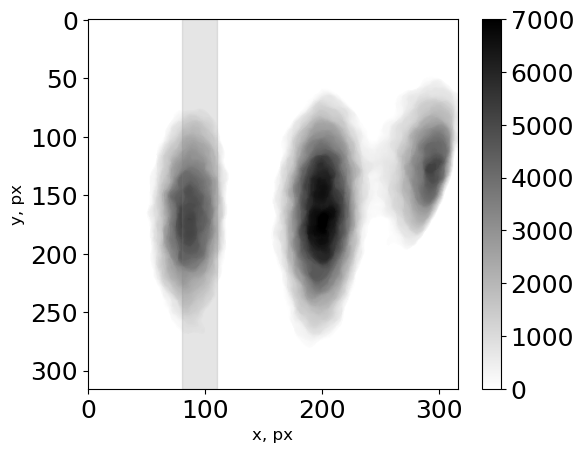

In [43]:
Mmin = 0
Mmax = 7000

M = M_array #np.asarray(img)
plt.imshow(M_matr, vmin=Mmin, vmax=Mmax, cmap="gray_r")

i1=80; i2=110
plt.axvspan(i1, i2, color='grey', alpha=0.2)

plt.colorbar()
# Установка меток осей
plt.xlabel('x, px', fontsize = 12)
plt.ylabel('y, px', fontsize = 12)
plt.show()

In [44]:
## nanoscan 4
S_0 = np.sum(y_slice, axis=1)

Y_pix_1 = np.arange(-130,  np.shape(y_slice)[0]-130, 1)

Y_pix = Y_pix_1*72.0/567

In [45]:
np.shape(S_0)

(316,)

In [46]:
# Эта ячейка используется для построения профиля гистограммы, отличного на -20% от расчетного значения эмиттанса 
line_08_hist = [7.14397339e-03, 7.44163895e-03, 8.03697006e-03, 6.54864227e-03,
 9.52529785e-03, 8.63230118e-03, 9.82296341e-03, 1.10136256e-02,
 1.25019534e-02, 1.48832779e-02, 1.57762746e-02, 2.32179135e-02,
 2.47062413e-02, 2.91712247e-02, 3.42315392e-02, 3.86965225e-02,
 4.61381615e-02, 4.49474992e-02, 4.49474992e-02, 4.85194859e-02,
 4.46498337e-02, 5.53657938e-02, 4.73288237e-02, 5.71517871e-02,
 5.89377805e-02, 5.77471182e-02, 6.60817538e-02, 7.67977139e-02,
 6.37004294e-02, 7.91790384e-02, 9.49553130e-02, 1.05075942e-01,
 1.26507862e-01, 1.50321107e-01, 1.53595428e-01, 1.71753027e-01,
 1.90505957e-01, 2.09258887e-01, 2.34560460e-01, 2.30988473e-01,
 2.35155791e-01, 2.61350360e-01, 2.65220012e-01, 2.66410674e-01,
 2.52718059e-01, 2.40216105e-01, 2.61648025e-01, 2.39323109e-01,
 2.55694714e-01, 2.61350360e-01, 2.88437926e-01, 3.08083852e-01,
 3.17311485e-01, 3.79225921e-01, 4.02443834e-01, 4.93231829e-01,
 5.24189047e-01, 5.78364179e-01, 6.04856414e-01, 6.50399244e-01,
 6.64687191e-01, 7.08146362e-01, 7.01597720e-01, 6.77784475e-01,
 6.45934261e-01, 6.58733880e-01, 6.31646314e-01, 6.05451745e-01,
 5.83126828e-01, 5.84615156e-01, 5.73601530e-01, 5.79257176e-01,
 5.79852507e-01, 6.09619063e-01, 6.39087953e-01, 7.14099673e-01,
 7.54284524e-01, 8.09054986e-01, 8.86150366e-01, 9.57887765e-01,
 9.86761324e-01, 1.05701040e+00, 1.05820106e+00, 1.03795980e+00,
 1.04034112e+00, 1.00194227e+00, 9.44195150e-01, 8.79899389e-01,
 8.36142552e-01, 7.78097768e-01, 7.20648316e-01, 6.92667753e-01,
 6.55757224e-01, 6.19739691e-01, 6.48613251e-01, 6.51589906e-01,
 6.88798101e-01, 7.18266991e-01, 7.70656129e-01, 7.69465467e-01,
 8.12924639e-01, 8.43286525e-01, 8.68885763e-01, 8.68290432e-01,
 8.38226211e-01, 8.45370184e-01, 8.06078331e-01, 7.48033547e-01,
 6.96835071e-01, 6.25990668e-01, 5.93842788e-01, 5.07222111e-01,
 4.79836879e-01, 4.31912724e-01, 4.02741500e-01, 3.63449646e-01,
 3.48566368e-01, 3.60472991e-01, 3.53626683e-01, 3.48864034e-01,
 3.79225921e-01, 3.81607245e-01, 3.88751219e-01, 3.70295954e-01,
 3.75951600e-01, 3.95597526e-01, 3.51543024e-01, 3.48864034e-01,
 3.12846501e-01, 2.64922346e-01, 2.58373704e-01, 2.29500145e-01,
 2.11937877e-01, 1.84254980e-01, 1.71455361e-01, 1.39605147e-01,
 1.30377514e-01, 1.24721869e-01, 1.09540925e-01, 1.07754932e-01,
 1.03885280e-01, 9.82296341e-02, 9.46576474e-02, 9.79319685e-02,
 8.51323495e-02, 9.52529785e-02, 8.00720351e-02, 8.27510251e-02,
 8.12626973e-02, 7.44163895e-02, 7.20350650e-02, 6.16167705e-02,
 5.17938071e-02, 4.58404959e-02, 3.54222014e-02, 3.42315392e-02,
 2.73852313e-02, 2.97665558e-02, 2.02412579e-02, 1.54786090e-02,
 1.42879468e-02, 1.25019534e-02, 1.33949501e-02, 1.30972845e-02,
 1.27996190e-02, 1.39902812e-02, 1.30972845e-02, 1.01206290e-02,
 1.36926157e-02, 1.13112912e-02, 9.52529785e-03, 7.14397339e-03,
 7.44163895e-03, 6.54864227e-03, 4.46498337e-03, 2.97665558e-03,
 4.16731781e-03, 2.97665558e-03, 2.38132446e-03, 1.78599335e-03,
 1.48832779e-03, 1.78599335e-03, 1.19066223e-03, 8.92996674e-04,
 5.95331116e-04, 1.78599335e-03, 1.19066223e-03, 8.92996674e-04,
 1.48832779e-03, 5.95331116e-04, 5.95331116e-04, 5.95331116e-04,
 8.92996674e-04, 2.97665558e-04, 2.97665558e-04, 0.00000000e+00,
 5.95331116e-04, 2.97665558e-04, 0.00000000e+00, 0.00000000e+00]
# Эта ячейка используется для построения профиля гистограммы, отличного на -20% от расчетного значения эмиттанса (центры бинов)
bin_centers_line_08_hist = [-20.895, -20.685, -20.475, -20.265, -20.055, -19.845, -19.635, -19.425, -19.215,
-19.005, -18.795, -18.585, -18.375, -18.165, -17.955, -17.745, -17.535, -17.325,
-17.115, -16.905, -16.695, -16.485, -16.275, -16.065, -15.855, -15.645, -15.435,
-15.225, -15.015, -14.805, -14.595, -14.385, -14.175, -13.965, -13.755, -13.545,
-13.335, -13.125, -12.915, -12.705, -12.495, -12.285, -12.075, -11.865, -11.655,
-11.445, -11.235, -11.025, -10.815, -10.605, -10.395, -10.185, -9.975, -9.765,
-9.555, -9.345, -9.135, -8.925, -8.715, -8.505, -8.295, -8.085, -7.875,
-7.665, -7.455, -7.245, -7.035, -6.825, -6.615, -6.405, -6.195, -5.985,
-5.775, -5.565, -5.355, -5.145, -4.935, -4.725, -4.515, -4.305, -4.095,
-3.885, -3.675, -3.465, -3.255, -3.045, -2.835, -2.625, -2.415, -2.205,
-1.995, -1.785, -1.575, -1.365, -1.155, -0.945, -0.735, -0.525, -0.315,
-0.105, 0.105, 0.315, 0.525, 0.735, 0.945, 1.155, 1.365, 1.575,
1.785, 1.995, 2.205, 2.415, 2.625, 2.835, 3.045, 3.255, 3.465,
3.675, 3.885, 4.095, 4.305, 4.515, 4.725, 4.935, 5.145, 5.355,
5.565, 5.775, 5.985, 6.195, 6.405, 6.615, 6.825, 7.035, 7.245,
7.455, 7.665, 7.875, 8.085, 8.295, 8.505, 8.715, 8.925, 9.135,
9.345, 9.555, 9.765, 9.975, 10.185, 10.395, 10.605, 10.815, 11.025,
11.235, 11.445, 11.655, 11.865, 12.075, 12.285, 12.495, 12.705, 12.915,
13.125, 13.335, 13.545, 13.755, 13.965, 14.175, 14.385, 14.595, 14.805,
15.015, 15.225, 15.435, 15.645, 15.855, 16.065, 16.275, 16.485, 16.695,
16.905, 17.115, 17.325, 17.535, 17.745, 17.955, 18.165, 18.375, 18.585,
18.795, 19.005, 19.215, 19.425, 19.635, 19.845, 20.055, 20.265, 20.475,
20.685, 20.895]

In [47]:
# Эта ячейка используется для построения профиля гистограммы, отличного на +10% от расчетного значения эмиттанса
line_11_hist = [0.03166879, 0.04788939, 0.03437222, 0.0405515, 0.0405515, 0.0482756,
0.04788939, 0.05368246, 0.05715831, 0.05213764, 0.05445487, 0.06295138,
0.06179276, 0.06372379, 0.06874445, 0.06990306, 0.09500637, 0.09500637,
0.10002703, 0.10968215, 0.11702004, 0.13053721, 0.14173715, 0.15293709,
0.17147492, 0.17726799, 0.19619202, 0.20314371, 0.21936431, 0.22631599,
0.24060557, 0.25991581, 0.23712973, 0.26068822, 0.28695014, 0.26918472,
0.28115707, 0.2915846, 0.2834743, 0.30548797, 0.32634303, 0.32595682,
0.30935002, 0.36689453, 0.35994284, 0.39817711, 0.44220446, 0.43563898,
0.48430078, 0.50670065, 0.57621751, 0.59436913, 0.58934847, 0.60093462,
0.66504461, 0.6727687, 0.66543081, 0.6727687, 0.71911327, 0.71023056,
0.6970996, 0.70984436, 0.71486502, 0.69092033, 0.68628587, 0.69362376,
0.6804928, 0.66156876, 0.70559611, 0.72799598, 0.75618893, 0.72374773,
0.79867146, 0.82840922, 0.90101572, 0.89406403, 0.91955355, 0.96126366,
0.99177384, 1.0207392, 1.02846329, 1.05549762, 1.05549762, 1.05820106,
1.03618739, 1.01803576, 1.00799444, 0.9481327, 0.94890511, 0.90217433,
0.87011934, 0.85621597, 0.80794037, 0.78283706, 0.8183679, 0.77858881,
0.7376511, 0.77125092, 0.78978875, 0.75696134, 0.8426988, 0.80485073,
0.85776078, 0.86625729, 0.83767814, 0.84192639, 0.85274012, 0.83265747,
0.83651952, 0.79828525, 0.78013363, 0.76777507, 0.76700266, 0.68396864,
0.66156876, 0.60595528, 0.59745877, 0.54570733, 0.52330746, 0.49048005,
0.4619009, 0.48121114, 0.45765265, 0.43602518, 0.40705982, 0.42328042,
0.39392886, 0.42443904, 0.41130808, 0.41632874, 0.39122543, 0.39392886,
0.38620477, 0.37500483, 0.34719808, 0.35106013, 0.31050863, 0.3000811,
0.31012243, 0.25991581, 0.23365388, 0.21472985, 0.19889545, 0.20584714,
0.19310238, 0.18692311, 0.15100606, 0.14328197, 0.14057853, 0.12088209,
0.12088209, 0.11586143, 0.10234426, 0.11122697, 0.09500637, 0.10466149,
0.08303402, 0.08342023, 0.081103, 0.09114432, 0.07878577, 0.07569613,
0.07222029, 0.06140656, 0.06295138, 0.05175144, 0.05252385, 0.04518596,
0.0405515, 0.03166879, 0.03746186, 0.02973777, 0.02935156, 0.02703433,
0.0239447, 0.02355849, 0.01351717, 0.01969644, 0.01892403, 0.01506199,
0.01815162, 0.01004132, 0.01158614, 0.01158614, 0.00965512, 0.00733789,
0.0084965, 0.0081103, 0.0077241, 0.00540687, 0.00695169, 0.00656548,
0.00617928, 0.00502066, 0.00386205, 0.00231723, 0.00270343, 0.00270343,
0.00115861, 0.00193102]
# Эта ячейка используется для построения профиля гистограммы, отличного на +10% от расчетного значения эмиттанса (центры бинов)
bin_centers_line_11_hist = [-20.895, -20.685, -20.475, -20.265, -20.055, -19.845, -19.635, -19.425, -19.215,
-19.005, -18.795, -18.585, -18.375, -18.165, -17.955, -17.745, -17.535, -17.325,
-17.115, -16.905, -16.695, -16.485, -16.275, -16.065, -15.855, -15.645, -15.435,
-15.225, -15.015, -14.805, -14.595, -14.385, -14.175, -13.965, -13.755, -13.545,
-13.335, -13.125, -12.915, -12.705, -12.495, -12.285, -12.075, -11.865, -11.655,
-11.445, -11.235, -11.025, -10.815, -10.605, -10.395, -10.185, -9.975, -9.765,
-9.555, -9.345, -9.135, -8.925, -8.715, -8.505, -8.295, -8.085, -7.875,
-7.665, -7.455, -7.245, -7.035, -6.825, -6.615, -6.405, -6.195, -5.985,
-5.775, -5.565, -5.355, -5.145, -4.935, -4.725, -4.515, -4.305, -4.095,
-3.885, -3.675, -3.465, -3.255, -3.045, -2.835, -2.625, -2.415, -2.205,
-1.995, -1.785, -1.575, -1.365, -1.155, -0.945, -0.735, -0.525, -0.315,
-0.105, 0.105, 0.315, 0.525, 0.735, 0.945, 1.155, 1.365, 1.575,
1.785, 1.995, 2.205, 2.415, 2.625, 2.835, 3.045, 3.255, 3.465,
3.675, 3.885, 4.095, 4.305, 4.515, 4.725, 4.935, 5.145, 5.355,
5.565, 5.775, 5.985, 6.195, 6.405, 6.615, 6.825, 7.035, 7.245,
7.455, 7.665, 7.875, 8.085, 8.295, 8.505, 8.715, 8.925, 9.135,
9.345, 9.555, 9.765, 9.975, 10.185, 10.395, 10.605, 10.815, 11.025,
11.235, 11.445, 11.655, 11.865, 12.075, 12.285, 12.495, 12.705, 12.915,
13.125, 13.335, 13.545, 13.755, 13.965, 14.175, 14.385, 14.595, 14.805,
15.015, 15.225, 15.435, 15.645, 15.855, 16.065, 16.275, 16.485, 16.695,
16.905, 17.115, 17.325, 17.535, 17.745, 17.955, 18.165, 18.375, 18.585,
18.795, 19.005, 19.215, 19.425, 19.635, 19.845, 20.055, 20.265, 20.475,
20.685, 20.895]

In [53]:
line_1_hist = [1.65453925e-02, 1.72494517e-02, 1.76014813e-02, 2.25298961e-02,
2.42900443e-02, 2.04177184e-02, 2.95704887e-02, 2.99225183e-02,
3.06265775e-02, 3.80191997e-02, 4.08354367e-02, 4.61158811e-02,
4.61158811e-02, 4.85800885e-02, 5.94930069e-02, 5.06922663e-02,
6.26612736e-02, 6.37173625e-02, 7.00538957e-02, 6.65335995e-02,
7.77985475e-02, 8.58952289e-02, 9.15277030e-02, 9.50479992e-02,
1.03848740e-01, 1.27082695e-01, 1.36235466e-01, 1.45388236e-01,
1.49964621e-01, 1.68974221e-01, 1.78126991e-01, 2.08401539e-01,
1.97488621e-01, 2.40436235e-01, 2.23538813e-01, 2.45012620e-01,
2.56277568e-01, 2.64022220e-01, 2.67190487e-01, 2.58741776e-01,
2.62966131e-01, 2.93944738e-01, 3.06969835e-01, 3.02745479e-01,
3.08377953e-01, 3.24219286e-01, 3.48157301e-01, 3.49565419e-01,
4.08354367e-01, 4.39332974e-01, 4.46373567e-01, 5.03050337e-01,
5.13611226e-01, 5.63599433e-01, 5.76976558e-01, 6.06547047e-01,
6.20980262e-01, 6.63927876e-01, 6.98426780e-01, 6.94906483e-01,
6.88217920e-01, 7.33981772e-01, 7.13564054e-01, 7.13564054e-01,
6.90330098e-01, 7.05467372e-01, 6.49494661e-01, 6.70616439e-01,
6.74136735e-01, 7.20604646e-01, 6.84697624e-01, 7.25181031e-01,
7.36093950e-01, 7.85378097e-01, 8.13540468e-01, 8.78665949e-01,
8.83946393e-01, 9.15981089e-01, 9.53296229e-01, 9.86034985e-01,
9.94483696e-01, 1.02616636e+00, 1.04975235e+00, 1.05820106e+00,
1.02616636e+00, 1.02264607e+00, 9.54000289e-01, 9.61392911e-01,
9.32174452e-01, 8.80426097e-01, 8.58600260e-01, 8.28677742e-01,
7.69888794e-01, 7.76577357e-01, 7.70592853e-01, 7.89954483e-01,
7.73057060e-01, 7.66720527e-01, 8.03683638e-01, 7.83265920e-01,
8.31141949e-01, 8.20933090e-01, 8.50855608e-01, 8.38534571e-01,
8.48039371e-01, 8.52967786e-01, 8.21989179e-01, 8.46983282e-01,
7.87138246e-01, 7.33981772e-01, 7.03355194e-01, 6.85049654e-01,
6.29076943e-01, 6.01618632e-01, 5.48462159e-01, 5.31564736e-01,
4.88617122e-01, 4.86152915e-01, 4.50245893e-01, 4.52358070e-01,
4.04834071e-01, 4.27715997e-01, 3.93921152e-01, 4.16803078e-01,
4.15042930e-01, 4.11874663e-01, 3.92513034e-01, 3.90048827e-01,
3.73151404e-01, 3.81600115e-01, 3.54493834e-01, 3.29851760e-01,
3.18234783e-01, 3.02745479e-01, 2.68598605e-01, 2.61205983e-01,
2.24242872e-01, 2.23890843e-01, 1.99248769e-01, 1.78126991e-01,
1.65453925e-01, 1.59821451e-01, 1.42924028e-01, 1.31307051e-01,
1.23562399e-01, 1.33067199e-01, 1.11945421e-01, 1.10889332e-01,
9.61040881e-02, 1.01384533e-01, 1.03496710e-01, 9.64561177e-02,
9.36398807e-02, 7.99107253e-02, 8.16708734e-02, 7.04059254e-02,
6.61815698e-02, 6.58295402e-02, 5.70287995e-02, 5.42125625e-02,
5.45645922e-02, 4.04834071e-02, 4.50597922e-02, 3.06265775e-02,
2.18258369e-02, 2.92184590e-02, 2.46420739e-02, 1.58413332e-02,
1.93616295e-02, 2.28819257e-02, 1.61933628e-02, 1.54893036e-02,
1.58413332e-02, 1.16169777e-02, 1.44332147e-02, 1.12649481e-02,
1.30250962e-02, 8.44871104e-03, 1.02088592e-02, 7.74465179e-03,
7.39262216e-03, 9.15277030e-03, 6.68856291e-03, 4.92841478e-03,
5.28044440e-03, 5.63247403e-03, 2.81623701e-03, 3.16826664e-03,
3.16826664e-03, 2.81623701e-03, 1.76014813e-03, 1.76014813e-03,
1.40811851e-03, 3.52029627e-04, 1.76014813e-03, 3.52029627e-04,
2.11217776e-03, 7.04059254e-04, 3.52029627e-04, 7.04059254e-04]

bin_centers_line_1_hist = [-20.895, -20.685, -20.475, -20.265, -20.055, -19.845, -19.635, -19.425, -19.215,
-19.005, -18.795, -18.585, -18.375, -18.165, -17.955, -17.745, -17.535, -17.325,
-17.115, -16.905, -16.695, -16.485, -16.275, -16.065, -15.855, -15.645, -15.435,
-15.225, -15.015, -14.805, -14.595, -14.385, -14.175, -13.965, -13.755, -13.545,
-13.335, -13.125, -12.915, -12.705, -12.495, -12.285, -12.075, -11.865, -11.655,
-11.445, -11.235, -11.025, -10.815, -10.605, -10.395, -10.185, -9.975, -9.765,
-9.555, -9.345, -9.135, -8.925, -8.715, -8.505, -8.295, -8.085, -7.875,
-7.665, -7.455, -7.245, -7.035, -6.825, -6.615, -6.405, -6.195, -5.985,
-5.775, -5.565, -5.355, -5.145, -4.935, -4.725, -4.515, -4.305, -4.095,
-3.885, -3.675, -3.465, -3.255, -3.045, -2.835, -2.625, -2.415, -2.205,
-1.995, -1.785, -1.575, -1.365, -1.155, -0.945, -0.735, -0.525, -0.315,
-0.105, 0.105, 0.315, 0.525, 0.735, 0.945, 1.155, 1.365, 1.575,
1.785, 1.995, 2.205, 2.415, 2.625, 2.835, 3.045, 3.255, 3.465,
3.675, 3.885, 4.095, 4.305, 4.515, 4.725, 4.935, 5.145, 5.355,
5.565, 5.775, 5.985, 6.195, 6.405, 6.615, 6.825, 7.035, 7.245,
7.455, 7.665, 7.875, 8.085, 8.295, 8.505, 8.715, 8.925, 9.135,
9.345, 9.555, 9.765, 9.975, 10.185, 10.395, 10.605, 10.815, 11.025,
11.235, 11.445, 11.655, 11.865, 12.075, 12.285, 12.495, 12.705, 12.915,
13.125, 13.335, 13.545, 13.755, 13.965, 14.175, 14.385, 14.595, 14.805,
15.015, 15.225, 15.435, 15.645, 15.855, 16.065, 16.275, 16.485, 16.695,
16.905, 17.115, 17.325, 17.535, 17.745, 17.955, 18.165, 18.375, 18.585,
18.795, 19.005, 19.215, 19.425, 19.635, 19.845, 20.055, 20.265, 20.475,
20.685, 20.895]

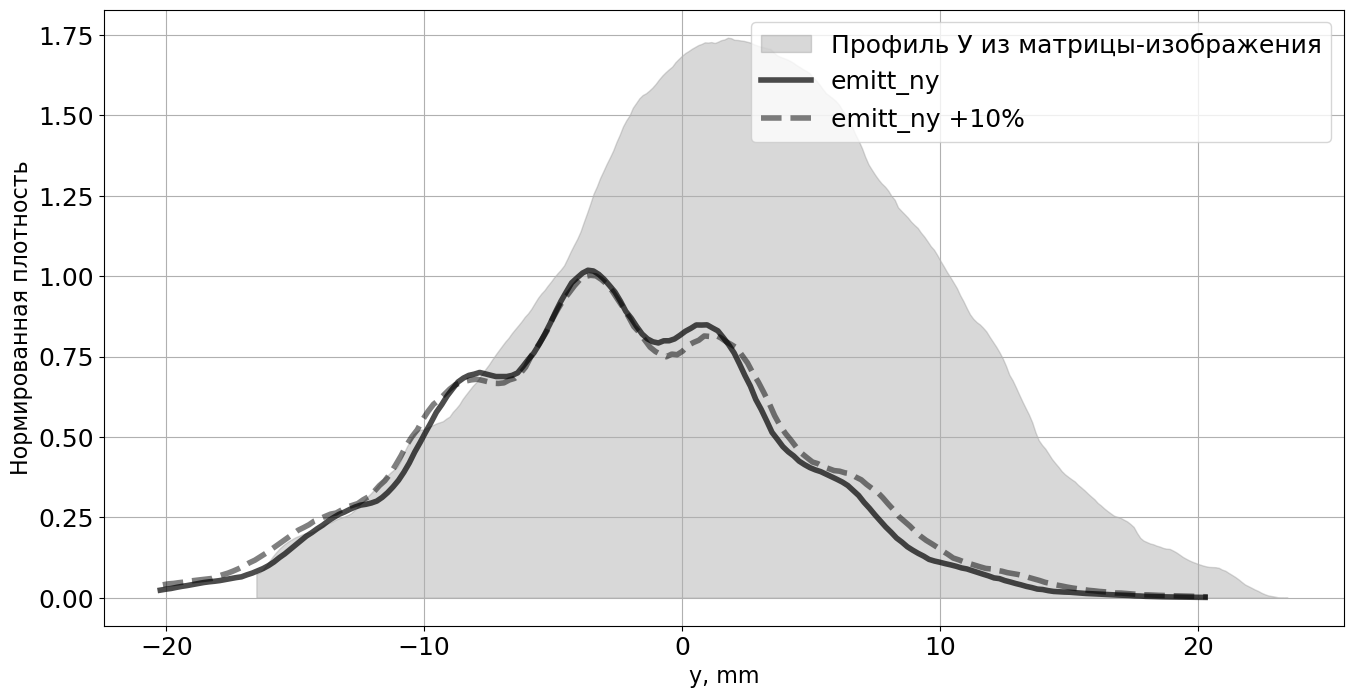

In [55]:
import numpy as np
import matplotlib.pyplot as plt

Smax = np.max(S_0)
Smin = np.min(S_0)
S = (S_0-Smin)/(Smax*0.835)

# Построение гистограммы
n_bins = 200
hist_range = (-21,21)

# Вычисляем значения гистограммы
counts, bin_edges = np.histogram(y_filtered2 / mm - (y0*1.3)/mm, bins=n_bins, range=hist_range, density=True) #y_l

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Нормируем на максимум
normalized_counts = counts / (np.max(counts)*0.955) #0.9


window_size = 7
line_1_hist_smooth = np.convolve(normalized_counts, np.ones(window_size)/window_size, mode='valid')
bin_centers_line_1_hist_smooth = bin_centers[window_size-1:]  # Adjust x to match smoothed y length

line_11_hist_smooth = np.convolve(line_11_hist, np.ones(window_size)/window_size, mode='valid')
bin_centers_line_11_hist_smooth_moved = bin_centers_line_11_hist[window_size-1:]  # Adjust x to match smoothed y length
bin_centers_line_11_hist_smooth = [i-0.5 for i in bin_centers_line_11_hist_smooth_moved]

# Рисуем нормированную гистограмму
fig, ax = plt.subplots(figsize=(16, 8))
# ax.bar(bin_centers, normalized_counts, width=np.diff(bin_edges)[0], edgecolor='grey', color='grey', alpha=0.3, align='center', label=f'Гистограмма по оси У')
# ax.plot(Y_pix, S[::-1], c='red', lw=1, alpha=1, label=f'Профиль У из матрицы-изображения') 
ax.fill_between(Y_pix, S[::-1], color ='gray', alpha=0.3, label=f'Профиль У из матрицы-изображения') 

# ax.plot(bin_centers_line_11_hist, line_11_hist, c='k', lw=4, alpha=0.5, linestyle='dashed', label=f'emitt_ny +10%') 

# ax.plot(bin_centers, normalized_counts, c='k', lw=4, alpha=0.5, label=f'emitt_ny') 
ax.plot(bin_centers_line_1_hist_smooth-0.6, line_1_hist_smooth, c='k', lw=4, alpha=0.7, label=f'emitt_ny') 
ax.plot(bin_centers_line_11_hist_smooth, line_11_hist_smooth*0.965, c='k', lw=4, alpha=0.5, linestyle='dashed', label=f'emitt_ny +10%') 

# Настройки осей
ax.set_xlabel('y, mm', fontsize = 16)
ax.set_ylabel('Нормированная плотность', fontsize = 16)
# ax.set_ylim(0, 1.1)
ax.grid(True)
plt.legend()
# ax.legend(title ="$E_{yn} = 360 ~ mm ~ mrad$ \n $s_{yf} = 4.4 ~ m$", loc='upper right')

plt.show()

fig.savefig(
    '2025-05-24-14-21-15_hist_p10%_article.png',
    dpi=900,
    bbox_inches='tight',  # Убирает лишние отступы
    pad_inches=0.1        # Добавляет небольшой отступ
)

In [50]:
# print(normalized_counts)
# print(bin_centers)

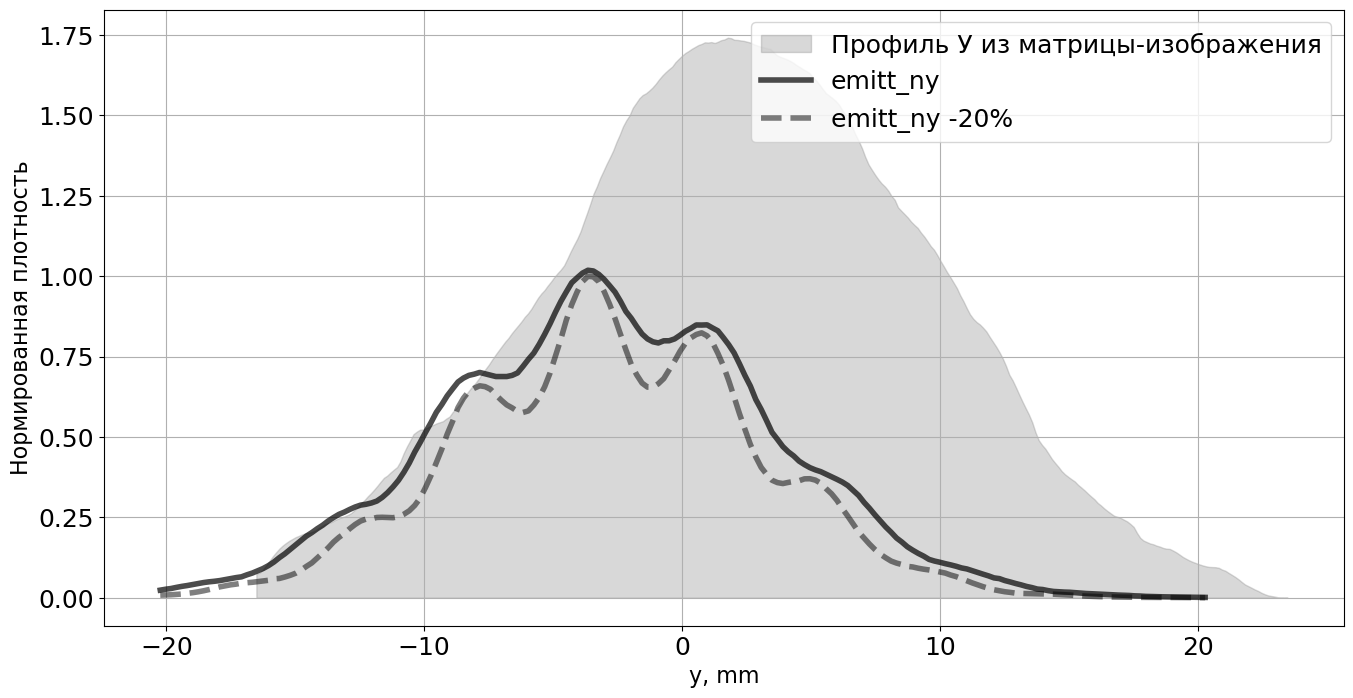

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Smax = np.max(S_0)
Smin = np.min(S_0)
S = (S_0-Smin)/(Smax*0.835)

# Построение гистограммы
n_bins = 200
hist_range = (-21,21)

# Вычисляем значения гистограммы
counts, bin_edges = np.histogram(y_filtered2 / mm - (y0*1.3)/mm, bins=n_bins, range=hist_range, density=True) #y_l

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Нормируем на максимум
normalized_counts = counts / (np.max(counts)*0.955) #0.9

window_size = 7
line_1_hist_smooth = np.convolve(normalized_counts, np.ones(window_size)/window_size, mode='valid')
bin_centers_line_1_hist_smooth = bin_centers[window_size-1:]  # Adjust x to match smoothed y length

line_08_hist_smooth = np.convolve(line_08_hist, np.ones(window_size)/window_size, mode='valid')
bin_centers_line_08_hist_smooth_moved = bin_centers_line_08_hist[window_size-1:]  # Adjust x to match smoothed y length
bin_centers_line_08_hist_smooth = [i-0.6 for i in bin_centers_line_08_hist_smooth_moved]



# Рисуем нормированную гистограмму
fig, ax = plt.subplots(figsize=(16, 8))
# ax.bar(bin_centers, normalized_counts, width=np.diff(bin_edges)[0], edgecolor='grey', color='grey', alpha=0.3, align='center', label=f'Гистограмма по оси У')
# ax.plot(Y_pix, S[::-1], c='black', lw=3, alpha=1, label=f'Профиль У из матрицы-изображения') 
ax.fill_between(Y_pix, S[::-1], color ='gray', alpha=0.3, label=f'Профиль У из матрицы-изображения')
ax.plot(bin_centers_line_1_hist_smooth-0.6, line_1_hist_smooth, c='k', lw=4, alpha=0.7, label=f'emitt_ny') 
ax.plot(bin_centers_line_08_hist_smooth, line_08_hist_smooth*0.98,c='k', lw=4, alpha=0.5, linestyle='dashed', label=f'emitt_ny -20%') 

# ax.plot(bin_centers_line_08_hist, line_08_hist, c='k', lw=4, alpha=0.5, linestyle='dashed', label=f'emitt_ny -20%') 
# ax.plot(bin_centers, normalized_counts, c='k', lw=4, alpha=0.5, label=f'emitt_ny') 


# Настройки осей
ax.set_xlabel('y, mm', fontsize = 16)
ax.set_ylabel('Нормированная плотность', fontsize = 16)
# ax.set_ylim(0, 1.1)
ax.grid(True)
plt.legend()
# ax.legend(title ="$E_{yn} = 360 ~ mm ~ mrad$ \n $s_{yf} = 4.4 ~ m$", loc='upper right')

plt.show()

fig.savefig(
    '2025-05-24-14-21-15_hist_m20%_article.png',
    dpi=900,
    bbox_inches='tight',  # Убирает лишние отступы
    pad_inches=0.1        # Добавляет небольшой отступ
)

In [56]:
# x_slice = Matrix[16:210,:]
x_slice = M_matr[75:115,:]

In [57]:
np.shape(x_slice)

(40, 316)

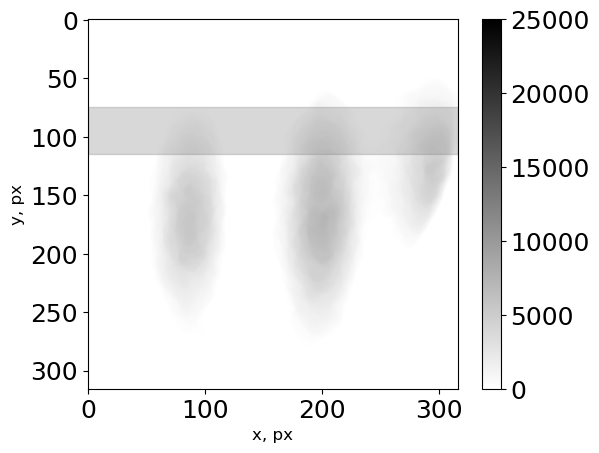

In [58]:
Mmin = 0
Mmax = 25000

M = M_matr #np.asarray(img)
plt.imshow(M, vmin=Mmin, vmax=Mmax, cmap="gray_r")

# i1=np.shape(y_slice)[0]; i2=np.shape(y_slice)[1]
i1=75; i2=115

plt.axhspan(i1, i2, color='gray', alpha=0.3)
plt.colorbar()
# Установка меток осей
plt.xlabel('x, px', fontsize = 12)
plt.ylabel('y, px', fontsize = 12)
plt.show()

In [59]:
## nanoscan 4

S_y_0 = np.sum(x_slice, axis=0)

Y_pix_1_y  = np.arange(-115,  np.shape(x_slice)[1]-115, 1)
Y_pix_y = Y_pix_1_y*70.0/(258+307)

In [60]:
S_y_0.shape

(316,)

In [61]:
np.max(S_y_0)

127630.2

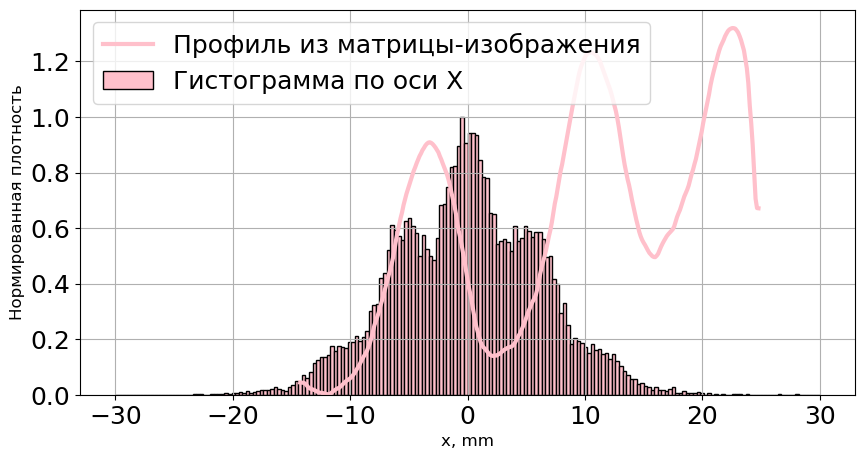

In [63]:
Smax_y_0 = np.max(S_y_0)
Smin_y_0 = np.min(S_y_0)
S_y = (S_y_0 - Smin_y_0)/(Smax_y_0*1.27)
# Построение гистограммы
n_bins = 200
hist_range = (-30, 30)

# Вычисляем значения гистограммы
counts, bin_edges = np.histogram(x_filtered1/mm - (x0*0.1)/mm , bins=n_bins, range=hist_range, density=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Нормируем на максимум
normalized_counts = counts / (np.max(counts)*1)

# Рисуем нормированную гистограмму
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(bin_centers, normalized_counts, width=np.diff(bin_edges)[0], edgecolor='black', color='pink', align='center', label=f'Гистограмма по оси X')
# ax.plot(Y_pix_y, S_y, c='pink', lw=2, alpha=1, label=f'Профиль из матрицы-изображения') 
ax.plot(Y_pix_y, S_y[::1], c='pink', lw=3, alpha=1, label=f'Профиль из матрицы-изображения') 

# Настройки осей
ax.set_xlabel('x, mm', fontsize = 12)
ax.set_ylabel('Нормированная плотность', fontsize = 12)
# ax.set_ylim(0, 1.1)
ax.grid(True)
plt.legend()
# Добавление легенды
# ax.legend(title ="$E_{xn} = 550 ~ mm ~ mrad$ \n $s_{xf} = 4.2 ~ m$", loc='upper right')

plt.show()

In [ ]:
# pwd

In [ ]:
# !jupyter nbconvert --to HTML Monte_Carlo_pepper_pot_git.ipynb